In [ ]:
#
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Integrate colab notebook with CUDA GPU

In [ ]:
#
!nvidia-smi

Fri Mar 17 05:06:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    25W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Convert PASCAL VOC XML to YOLO for Object Detection

In [ ]:
#the dataset consists of 3 sets , it consists of 1711 .jpg images and 1711 .xml images for annotations 
import os
print("No_of_files_for_google_images : ",len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/google_images')))
print("No_of_files_for_video_images : ",len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/video_images')))
c = 0
for names in os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX'):
  c += len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/'+names)) 
print("No_of_files_for_State_wise_OLX : ",c)
print("total no of images in datasets are : ",(len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/google_images'))+len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/video_images'))+c)//2)

SEGREGATE XML FILES AND JPG FILES AND GENERATE VALUES IN TXT FILES

In [ ]:
l = os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX')[:-4]
print(l)

In [ ]:
#to shift all xml files to annotations folder  (perform this operation only once)
import os
import shutil
sourcepath= '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX'
destinationpath = '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/annotations'
directories = os.listdir(sourcepath)
directories = directories[:-4]
for i in directories:
    path_of_subdirectory = sourcepath + '/'+ i
    sourcefiles = os.listdir(path_of_subdirectory)
    print(sourcefiles)
    for file in sourcefiles:
        if file.endswith('.xml'):
            shutil.move(os.path.join(path_of_subdirectory,file), os.path.join(destinationpath,file))

In [ ]:
#to shift all jpg files to annotations folder (perform this operation only once)
import os
import shutil
sourcepath= '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX'
destinationpath = '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/images'
directories = os.listdir(sourcepath)
directories = directories[:-4]
for i in directories:
    path_of_subdirectory = sourcepath + '/'+ i
    sourcefiles = os.listdir(path_of_subdirectory)
    print(sourcefiles)
    for file in sourcefiles:
        if file.endswith('.jpg'):
            shutil.move(os.path.join(path_of_subdirectory,file), os.path.join(destinationpath,file))

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/images')))

605


In [ ]:
!python /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/xml2yolo2.py /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/annotations /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/images /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/labels 

/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/annotations /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/images /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/labels
MH5 image does not exist!


In [ ]:
#plot the check whether the given value is forming the bounding box forlisence plate 
!python /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/draw_boxes.py /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/AN/images/AN10.jpg /content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/AN/labels/AN10.txt

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=272x363 at 0x7F7AE8AE9F10>


['.config', 'drive', '.ipynb_checkpoints', 'labels', 'example.jpg', 'lisence_plate_numbers_for_dataset.txt', 'sample_data']


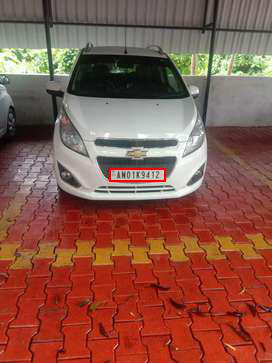

In [ ]:
print(os.listdir())
from PIL import Image   
Image.open("/content/example.jpg")
#!cat "/content/lisence_plate_numbers_for_dataset.txt"

Train Test Split with YOLOV3 

In [ ]:
def shift_files(src_path,dest_path):
    directory = os.listdir(src_path)
    for file in directory:
      shutil.move(os.path.join(src_path,file), os.path.join(dest_path,file))
    print("shifted all the files from "+src_path+" to "+dest_path)   

In [ ]:
import os
import shutil
destination_path = '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/Custom_Dataset_for_training'
sourcepath_txt = '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/labels'
sourcepath_jpg = '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/images' 
shift_files(sourcepath_txt,destination_path)
shift_files(sourcepath_jpg,destination_path)

In [ ]:
print(len(os.listdir('/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/Custom_Dataset_for_training')))

1212


In [ ]:
#
%cd /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE

[Errno 2] No such file or directory: '/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE'
/content


In [ ]:
!python /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/creating_train_test_files_for_numberplate_detection.py

Traceback (most recent call last):
  File "/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/creating_train_test_files_for_numberplate_detection.py", line 7, in <module>
    os.chdir(full_path_to_images)
FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DatasetsForSIH/archive/State-wise_OLX/Custom_Dataset_for_training'


Installation of Darknet for YOLOV3
 

In [ ]:
#
!git clone 'https://github.com/AlexeyAB/darknet.git' '/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet'

Cloning into '/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet'...
remote: Enumerating objects: 15514, done.
remote: Total 15514 (delta 0), reused 0 (delta 0), pack-reused 15514
Receiving objects: 100% (15514/15514), 14.16 MiB | 11.65 MiB/s, done.
Resolving deltas: 100% (10413/10413), done.
Updating files: 100% (2058/2058), done.


In [ ]:
#
%cd /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/custom_weight
!wget https://pjreddie.com/media/files/darknet53.conv.74

[Errno 2] No such file or directory: '/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/custom_weight'
/content
--2023-03-17 05:14:04--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  17.3MB/s    in 10s     

2023-03-17 05:14:16 (14.8 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
#
%cd /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet
!sed -i 's/GPU=0/GPU=1/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

/content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet
mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
  946 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
 1147 |             if (iteration_ol

In [ ]:
%cd /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet
!sed -i 's/GPU=1/GPU=0/g' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/g' Makefile
!make

In [ ]:
!cat Makefile

In [ ]:
!python /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/creating_names_data_files_for_numberplate_detection.py

In [ ]:
#
%cd /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet
!chmod a+x ./darknet

In [ ]:
#!./darknet detector train /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/labelled_LP_data.data /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet/cfg/yolov3_custom2.cfg /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/custom_weight/darknet53.conv.74 -dont_show
!./darknet detector train /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/labelled_LP_data.data /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet/cfg/yolov3_custom2.cfg /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/Darknet/backup/yolov3_custom2_1000.weights -dont_show

 CUDA-version: 11080 (12000), GPU count: 1  
 OpenCV version: 4.2.0
Couldn't open file: /content/drive/MyDrive/MAJOR_PROJECT_NUMBER_PLATE/labelled_LP_data.data


In [ ]:
!./darknet detector map /content/drive/MyDrive/MAJOR_PROJECT_DATASET/Dataset/labelled_data.data /content/drive/MyDrive/MAJOR_PROJECT_DATASET/Darknet/cfg/yolov3_custom.cfg /content/drive/MyDrive/MAJOR_PROJECT_DATASET/Darknet/backup/yolov3_custom2_1000.weights -dont_show

CUDA status Error: file: ./src/dark_cuda.c : () : line: 38 : build time: Mar 17 2023 - 03:52:29 

 CUDA Error: no CUDA-capable device is detected
Darknet error location: ./src/dark_cuda.c, check_error, line #69
CUDA Error: no CUDA-capable device is detected: Bad file descriptor
